In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from IPython.core.display import display, HTML, Markdown

In [136]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
display(HTML("<style>.container { width:99% !important; }</style>"))

In [137]:
path_2019='../Dados/obitos-2019.csv'
path_2020='../Dados/obitos-2020.csv'

In [138]:
dados_2019 = pd.read_csv(path_2019)

dados_2020 = pd.read_csv(path_2020)

In [139]:
print(f"Forma da base de 2019: {dados_2019.shape}\nForma da base de 2020: {dados_2020.shape}")

Forma da base de 2019: (12385, 6)
Forma da base de 2020: (14921, 6)


In [140]:
dados_2019.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
3592,BA,INSUFICIENCIA_RESPIRATORIA,OUTRO,40 - 49,M,7
2335,RS,OUTRAS,DOMICILIO,20 - 29,M,42
7223,CE,INSUFICIENCIA_RESPIRATORIA,OUTRO,70 - 79,F,6
7387,GO,SEPTICEMIA,IGNORADO,70 - 79,F,8
40,AL,INDETERMINADA,HOSPITAL,< 9,M,1


### Desafio 01 - Verificar como são classificados os dados

Disponivel o dicionario do registro de obito [aqui](https://transparencia.registrocivil.org.br/covid/dicionario_covid-19.pdf)

Fim do Desafio

In [141]:
#Verificando se tem todos os estados
len(dados_2019.uf.unique())

27

In [142]:
dados_2019['tipo_doenca'].unique()

array(['OUTRAS', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG', 'COVID'], dtype=object)

In [143]:
dados_2019['tipo_doenca'].value_counts()

OUTRAS                        3847
PNEUMONIA                     2353
INSUFICIENCIA_RESPIRATORIA    2324
SEPTICEMIA                    2065
INDETERMINADA                 1308
SRAG                           487
COVID                            1
Name: tipo_doenca, dtype: int64

In [144]:
dados_2020['tipo_doenca'].value_counts()

OUTRAS                        3801
INSUFICIENCIA_RESPIRATORIA    2334
PNEUMONIA                     2214
COVID                         2112
SEPTICEMIA                    2031
INDETERMINADA                 1347
SRAG                          1082
Name: tipo_doenca, dtype: int64

### Desafio 02 - Fazer o somatorio dos valores e não a contagem

In [145]:
dados_2019.groupby('tipo_doenca').sum()

,total
tipo_doenca,
COVID,1
INDETERMINADA,6988
INSUFICIENCIA_RESPIRATORIA,100608
OUTRAS,660740
PNEUMONIA,226352
SEPTICEMIA,175533
SRAG,1498


In [146]:
dados_2020.groupby('tipo_doenca').sum()

,total
tipo_doenca,
COVID,195787
INDETERMINADA,9713
INSUFICIENCIA_RESPIRATORIA,98978
OUTRAS,690474
PNEUMONIA,182081
SEPTICEMIA,162864
SRAG,16563


In [147]:
round(dados_2020.groupby('tipo_doenca').sum()/dados_2019.groupby('tipo_doenca').sum(),2)

,total
tipo_doenca,
COVID,195787.00
INDETERMINADA,1.39
INSUFICIENCIA_RESPIRATORIA,0.98
OUTRAS,1.05
PNEUMONIA,0.80
SEPTICEMIA,0.93
SRAG,11.06


### Desafio 03 - Explorar os outros campos da base

In [148]:
def grafico_comparativo(causa):
    total_2019 = dados_2019.groupby('tipo_doenca').sum()
    total_2020 = dados_2020.groupby('tipo_doenca').sum()
    
    lista = int(total_2019.loc[causa]) , int(total_2020.loc[causa])
    
    plt.figure(figsize=(8,6))
    dados = pd.DataFrame({'Total':lista,
                         'Ano':[2019,2020]})
    plt.title('Obitor por '+causa)
    
    
    
    sns.barplot(x='Ano', y='Total',data=dados)


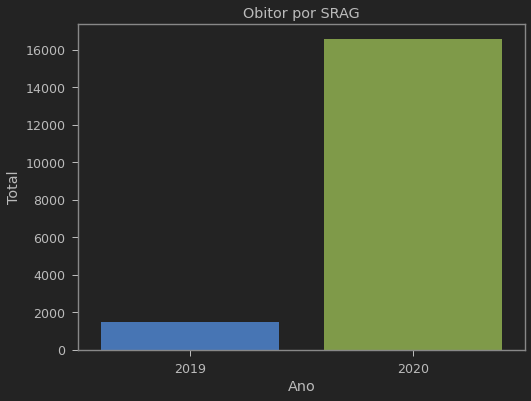

In [149]:
grafico_comparativo('SRAG')

### Desafio 4 - Adicionar na função opção de filtrar por estado

In [150]:
def grafico_comparativo_estado(causa,uf):
    total_2019 = dados_2019.query("uf == uf").groupby('tipo_doenca').sum()
    total_2020 = dados_2020.query("uf == uf").groupby('tipo_doenca').sum()
    
    lista = int(total_2019.loc[causa]) , int(total_2020.loc[causa])
    
    plt.figure(figsize=(8,6))
    dados = pd.DataFrame({'Total':lista,
                         'Ano':[2019,2020]})
    plt.title('Obitor por '+causa+' no estado do: '+uf)
    
    
    
    sns.barplot(x='Ano', y='Total',data=dados)

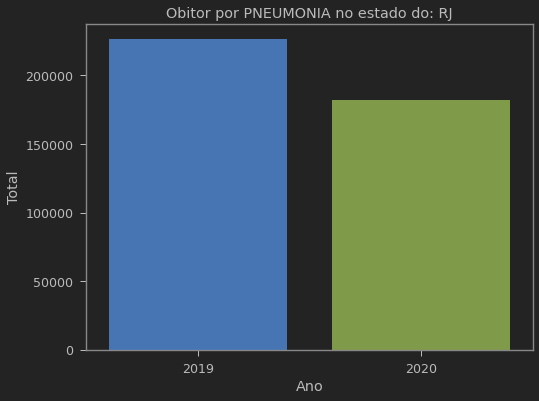

In [151]:
grafico_comparativo_estado('PNEUMONIA','RJ')

Fim do desadio

In [152]:
def grafico_comparativo(causa,uf='BRASIL'):
    
    if uf == 'BRASIL':
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()
        lista = int(total_2019.loc[causa]) , int(total_2020.loc[causa])
         else:
        total_2019 = dados_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca']).sum()

        lista = int(total_2019.loc[uf ,causa]) , int(total_2020.loc[uf,causa])

    plt.figure(figsize=(8,6))
    dados = pd.DataFrame({'Total':lista,
                         'Ano':[2019,2020]})
    plt.title('Obitor por '+causa+' no estado: '+uf)
    
    
    
    sns.barplot(x='Ano', y='Total',data=dados)


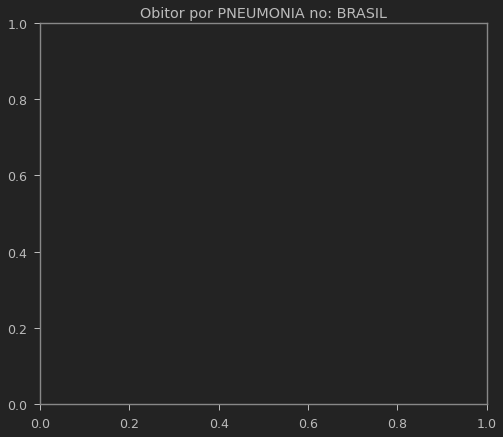

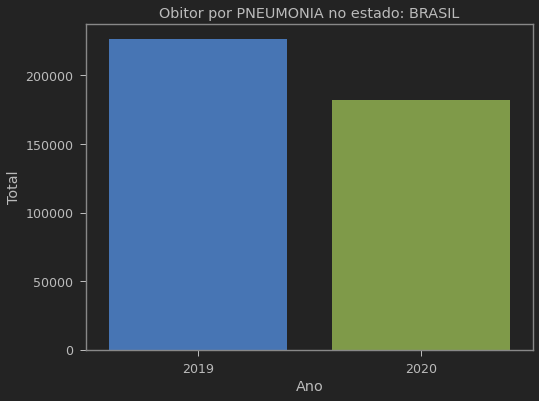

In [153]:
grafico_comparativo('PNEUMONIA')

### Desafio 05 - Entender como funciona uma aplicação WEB

Resposta [aqui](https://www.devmedia.com.br/como-funcionam-as-aplicacoes-web/25888)

Fim do desafio

### Desafio 06 - Melhorar a função para aceitar apenas o estado

In [154]:
def grafico_comparativo(causa='TODAS',uf='BRASIL'):
    
    if uf == 'BRASIL':
        total_2019 = dados_2019.groupby('tipo_doenca').sum()
        total_2020 = dados_2020.groupby('tipo_doenca').sum()
        if causa =='TODAS':
            lista = int(total_2019['total'].sum()) , int(total_2020['total'].sum())
        else:
            lista = int(total_2019.loc[causa]) , int(total_2020.loc[causa])
    

    else:
        total_2019 = dados_2019.groupby(['uf','tipo_doenca']).sum()
        total_2020 = dados_2020.groupby(['uf','tipo_doenca']).sum()
        if causa =='TODAS':
            lista = int(total_2019.loc[uf].sum()) , int(total_2020.loc[uf].sum())
        else:    
            lista = int(total_2019.loc[uf ,causa]) , int(total_2020.loc[uf,causa])
        

    plt.figure(figsize=(8,6))
    dados = pd.DataFrame({'Total':lista,
                         'Ano':[2019,2020]})
    plt.title('Obitor por '+causa+' no estado: '+uf)
    sns.barplot(x='Ano', y='Total',data=dados)


Fim do desafio